In [4]:
import sys
import os
import torch
import torchvision.transforms as transforms

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:    
    sys.path.append(project_root)
from src.my_app.core.MyDataset.OldMyDataset_speed import PreTrainDataset_old
import multiprocessing as mp

In [5]:
# --- Dataset ---
transform = transforms.Compose([
    # transforms.Resizeze((128, 128)),
    transforms.ToTensor()
])
test_doc_id_list = ['100241706', '100249371', '100249376', '100249416', '100249476', '100249537', '200003076', '200003803', '200003967', '200004107']

train_dataset = dataset = PreTrainDataset_old(
    input_path='../../kuzushiji-recognition/synthetic_images/input_images/',
    json_path='../../kuzushiji-recognition/synthetic_images/gt_json.json',
    test_doc_id_list=test_doc_id_list,
    test_mode=False,
    # device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    # precompute_gt=True,
    precompute_gt=False,
    transform=transform,
    # target_width=400  # 横幅を400ピクセルに固定
)

test_dataset = PreTrainDataset_old(
    input_path='../../kuzushiji-recognition/synthetic_images/input_images/',
    json_path='../../kuzushiji-recognition/synthetic_images/gt_json.json',
    test_doc_id_list=test_doc_id_list,
    test_mode=True,
    # device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    # precompute_gt=True,
    precompute_gt=False,
    transform=transform,
    # target_width=400  # 横幅を400ピクセルに固定
)


# # 最適化されたDataLoaderの作成
train_dl = PreTrainDataset_old.create_optimized_dataloader_for_old_dataset(
    train_dataset,
    batch_size=1,
    num_workers=min(mp.cpu_count(), 4)
)
# test_dl = PreTrainDataset_old.create_optimized_dataloader_for_old_dataset(
#     test_dataset,
#     batch_size=1,
#     num_workers=min(mp.cpu_count(), 4)
# )

FileNotFoundError: [Errno 2] No such file or directory: '../../kuzushiji-recognition/synthetic_images/input_images/'

torch.Size([434, 300]) torch.Size([434, 300])


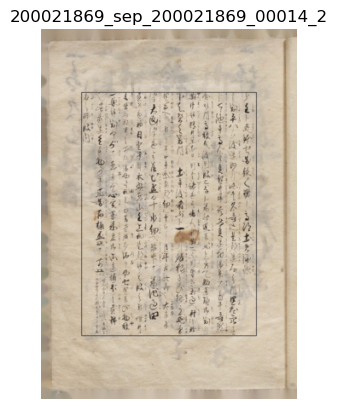

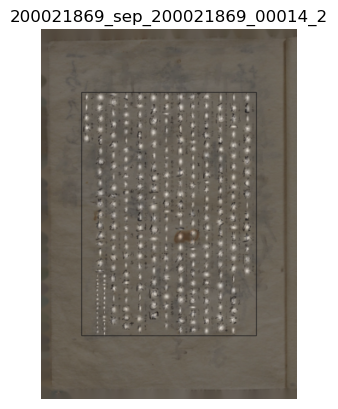

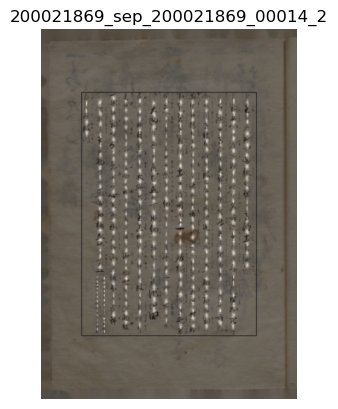

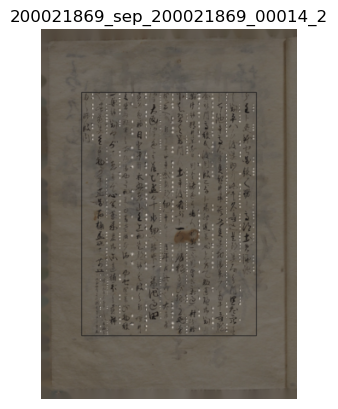

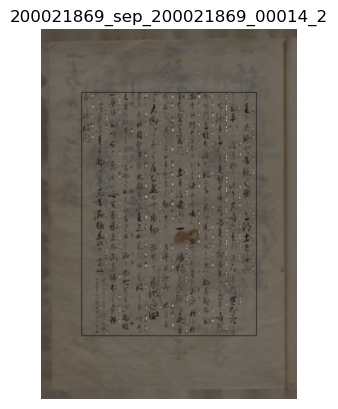

torch.Size([435, 300]) torch.Size([435, 300])


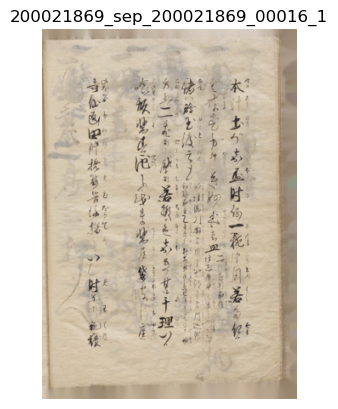

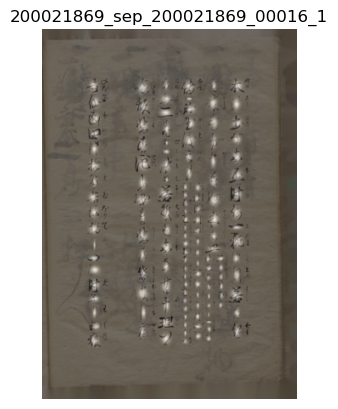

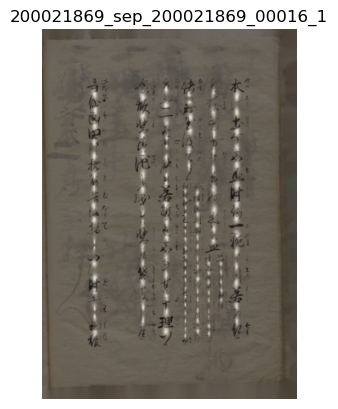

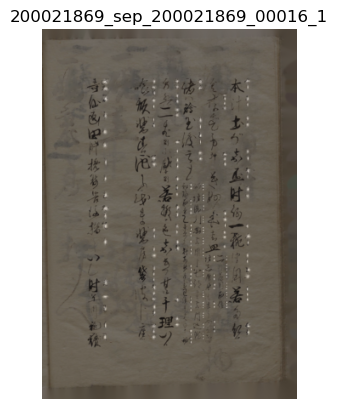

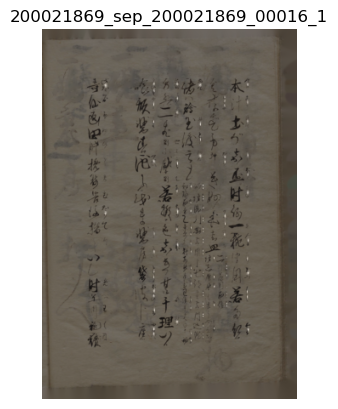

torch.Size([420, 300]) torch.Size([420, 300])


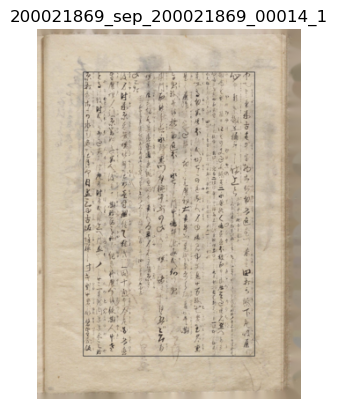

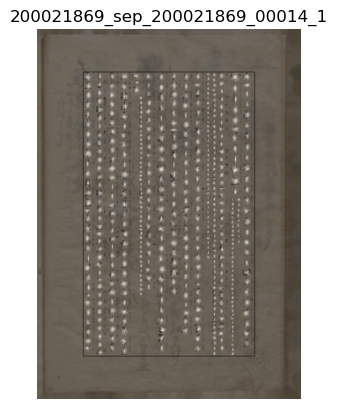

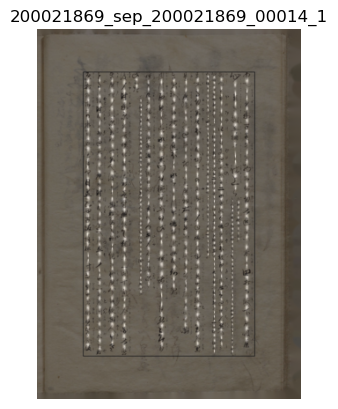

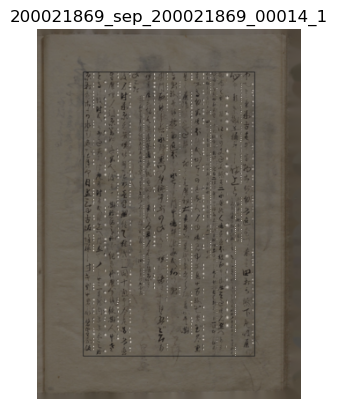

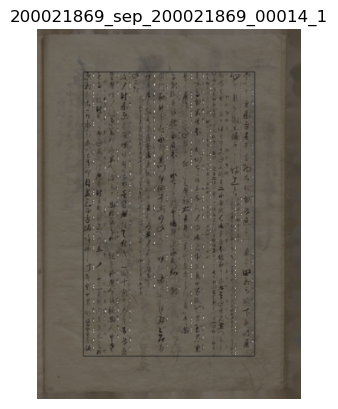

torch.Size([434, 300]) torch.Size([434, 300])


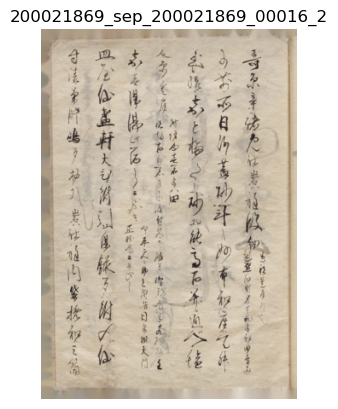

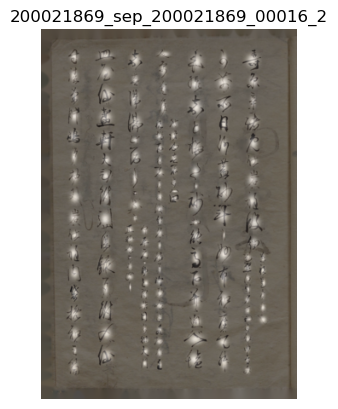

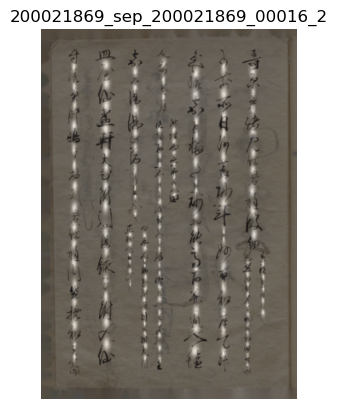

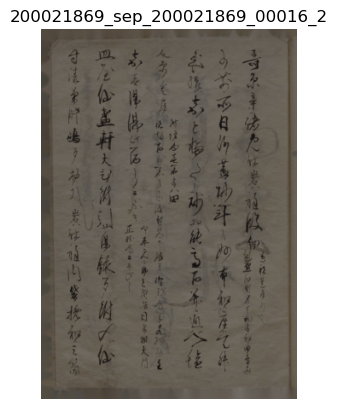

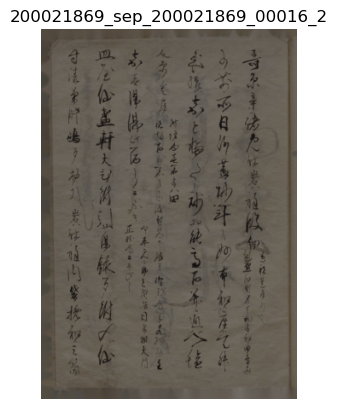

torch.Size([416, 300]) torch.Size([416, 300])


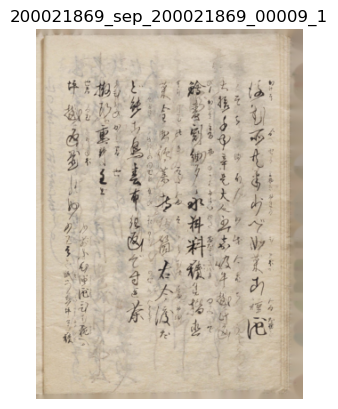

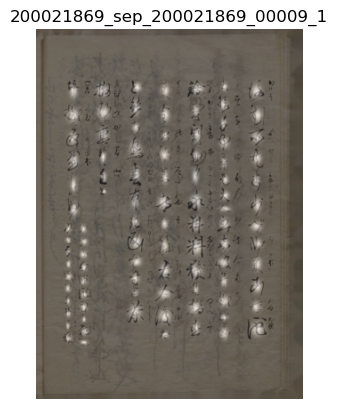

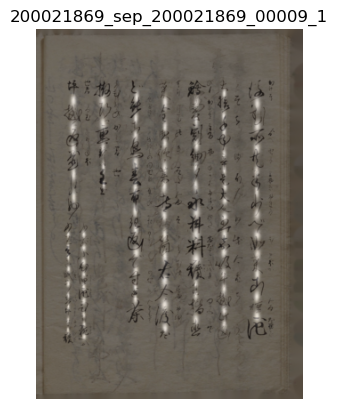

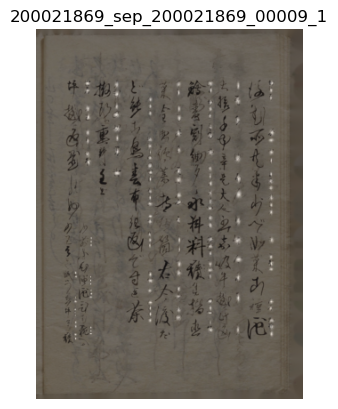

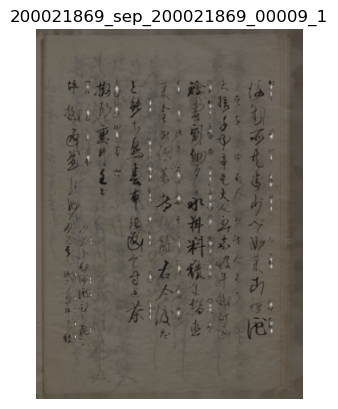

FileNotFoundError: [Errno 2] No such file or directory: '../../kuzushiji-recognition/synthetic_images/input_images/.jpg'

In [ ]:
from matplotlib import pyplot as plt
for data in train_dataset:
    print(data[0][0].shape, data[1][0].shape)
    plt.title(data[2])
    plt.imshow(data[0].permute(1, 2, 0).cpu().numpy())
    plt.axis('off')
    plt.show()
    for i in range(4):
        combined = (data[0] / 2) + (data[1][i] / 2)
        plt.title(data[2])
        plt.imshow(combined.permute(1, 2, 0).cpu().numpy(), cmap='gray')
        plt.axis('off')
        plt.show()

In [3]:
os.listdir('../../kuzushiji-recognition/synthetic_images/')

['gt_json.json',
 '.DS_Store',
 'gt_json_backup.json',
 'pre_training_color_annotations.csv',
 'pre_training_color_furi_annotations.csv']

# データセットが間違っているかもしれない、確認

In [ ]:
import json

json_path = '../../kuzushiji-recognition/synthetic_images/gt_json.json'
with open(json_path, 'r', encoding='utf-8') as f:
    data_json = json.load(f)

print(type(data_json))
print(list(data_json['files'].keys())[:5])  # 最初の5キーを表示

<class 'dict'>
['100241706_sep_100241706_00002_1', '100241706_sep_100241706_00002_2', '100241706_sep_100241706_00003_1', '100241706_sep_100241706_00003_2', '100241706_sep_100241706_00004_1']


In [ ]:
id = 'umgy00000_sep_umgy003_040'
id in data_json['files']  # Trueなら存在する

True

In [ ]:
list(data_json['files'].keys()).count(id)

1

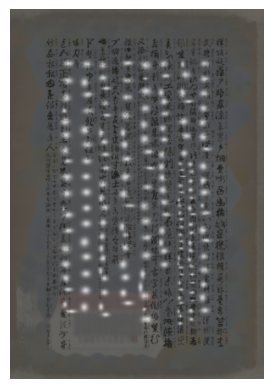

In [ ]:
a = data_json['files'][id]['main_region']

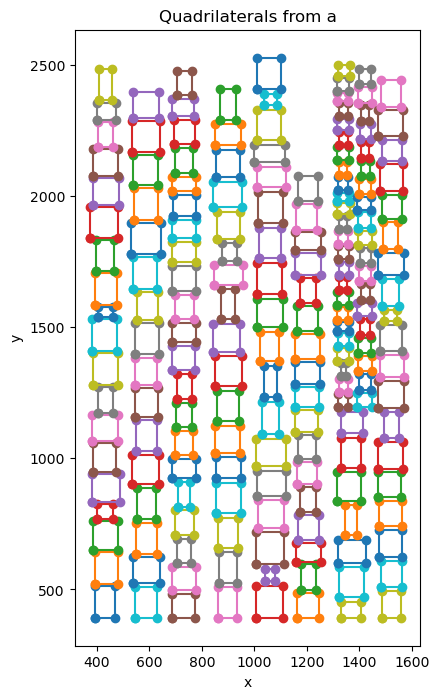

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
for quad in a:
    # quad: [x0, y0, x1, y1, x2, y2, x3, y3]
    xs = [quad[0], quad[2], quad[4], quad[6], quad[0]]
    ys = [quad[1], quad[3], quad[5], quad[7], quad[1]]
    plt.plot(xs, ys, marker='o')
plt.gca().set_aspect('equal')
plt.title('Quadrilaterals from a')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# ずれている原因を探る

## gt_json はマルチプロセス実行なので、番号順じゃない。

In [ ]:
test_dataset.input_imageID_list

['100241706_sep_100241706_00027_1',
 '100241706_sep_100241706_00018_2',
 '100241706_sep_100241706_00003_1',
 '100241706_sep_100241706_00025_2',
 '100241706_sep_100241706_00027_2',
 '100241706_sep_100241706_00018_1',
 '100241706_sep_100241706_00025_1',
 '100241706_sep_100241706_00003_2',
 '100241706_sep_100241706_00021_1',
 '100241706_sep_100241706_00007_2',
 '100241706_sep_100241706_00005_1',
 '100241706_sep_100241706_00023_2',
 '100241706_sep_100241706_00038_1',
 '100241706_sep_100241706_00007_1',
 '100241706_sep_100241706_00021_2',
 '100241706_sep_100241706_00023_1',
 '100241706_sep_100241706_00005_2',
 '100241706_sep_100241706_00038_2',
 '100241706_sep_100241706_00026_2',
 '100241706_sep_100241706_00024_1',
 '100241706_sep_100241706_00002_2',
 '100241706_sep_100241706_00019_1',
 '100241706_sep_100241706_00026_1',
 '100241706_sep_100241706_00002_1',
 '100241706_sep_100241706_00024_2',
 '100241706_sep_100241706_00019_2',
 '100241706_sep_100241706_00006_1',
 '100241706_sep_100241706_00